# Optimalisasi Strategi Listing Airbnb di Bangkok Berdasarkan Harga, Ulasan, dan Ketersediaan

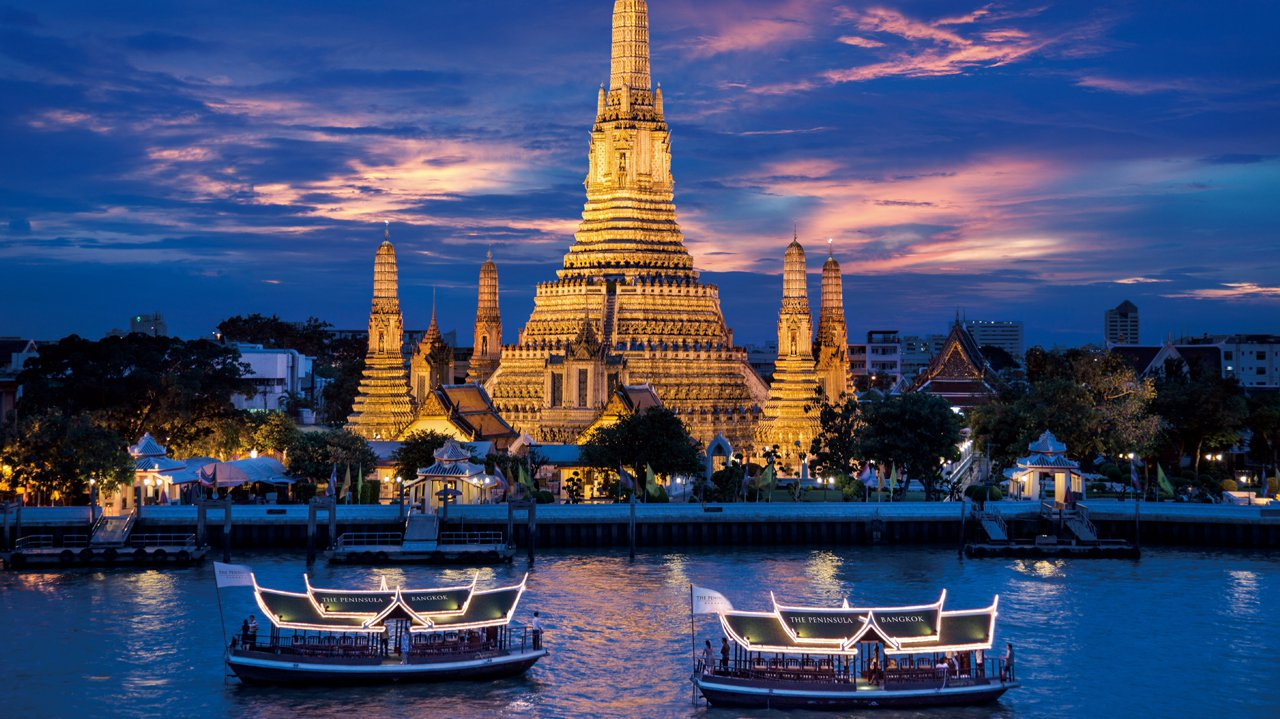

## Latar Belakang

Bangkok adalah salah satu destinasi wisata paling populer di dunia, dengan jutaan turis mengunjungi setiap tahunnya. Airbnb menjadi salah satu platform utama yang digunakan turis untuk menemukan akomodasi yang sesuai. Dalam dataset ini, berbagai listing di Bangkok tercatat tentang harga, lokasi, tipe kamar, ulasan, dan ketersediaan. Pemilik ingin memahami faktor yang memengaruhi rata-rata harga berdasarkan tipe kamar, Pemahaman mendalam tentang faktor-faktor yang memengaruhi harga berdasarkan tipe kamar dapat membantu tim business dan tim marketing Airbnb dalam menetapkan strategi harga yang kompetitif. Selain itu, analisis jumlah review positif di tiap neighbourhood dapat mengungkap wilayah mana yang paling diminati, sehingga tim business development dapat fokus pada pengembangan listing di area yang memiliki potensi pertumbuhan tinggi.

### Rumusan Masalah
1. Apa saja faktor yang memengaruhi rata-rata harga berdasarkan tipe kamar

2. Analisa jumlah review positif berdasarkan neighbourhood

3. Bagaimana tingkat ke-aktifan listing di Airbnb berdasarkan frekuensi ulasan terbaru dan dampaknya?

### Stakeholder

1. Tim marketing / pemasaran Airbnb
2. Tim Business Developement

### Tujuan Analisis
1. Mengidentifikasi faktor-faktor yang memengaruhi rata-rata harga listing berdasarkan tipe kamar di Airbnb.

2. Dengan melihat jumlah review positif di setiap neighbourhood, dihimbau dapat mengukur tingkat popularitas masing-masing wilayah di Bangkok.
   dan mengidentifikasikan popularitas tiap wilayah.

3. Memahami seberapa besar pengaruh frekuensi ulasan terbaru terhadap kinerja dan ke-aktifan listing di Airbnb.

<!-- 4. Menganalisis pola ketersediaan listing sepanjang tahun dan melihat keterkaitannya dengan keaktifan listing, guna mendukung perencanaan strategi   pengelolaan dan promosi properti. -->

## Penjelasan Kolom

- **id:** Pengenal unik Airbnb pada daftar.
- **name:** Deskripsi yang diberikan oleh pemilik mengenai property yang disewakan.
- **host_id:** Kode unik Airbnb terhadap host/pemilik property.
- **host_name:** Nama tuan rumah atau pemilik yang menyewakan property.
- **neighbourhood:** Nama daerah atau kecamatan letak Airbnb pada daftar.
- **latitude:** Letak latitude koordinat spesifik dari properti pada daftar.
- **longitude:** Letak longitude koordinat spesifik dari properti pada daftar.
- **room_type:** Tipe kamar yang tersedia pada daftar, terbagi atas 4 tipe yaitu:
  * Entire home/apt        
  * Private room 
  * Hotel room             
  * Shared room
- **price:** Harga sewa harian dalam mata uang lokal.
- **minimum_nights:** Jumlah minimum lama menginap masing-masing properti.
- **number_of_reviews:** Jumlah ulasan yang dimiliki masing-masing properti.
- **last_review:** Tanggal ulasan terakhir atau terbaru.
- **reviews_per_month:** Rata-rata jumlah review masing-masing properti tiap bulannya.
- **calculated_host_listing_count:** Jumlah properti yang dimiliki tiap host_id atau host_name.
- **availability_365:** Ketersediaan properti selama 1 tahun kalender (dalam bentuk hari).
- **numbers_of_reviews_ltm:** Jumlah ulasan yang dimiliki masing-masing properti, dalam kurun 12 bulan terakhir.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy

## Read Dataset

In [6]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


# Data Understanding

In [8]:
## lihat informasi dari kolom yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [9]:
## Melihat jumlah null pada setiap kolom
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Insight 

`Kolom name`, `last_review`, dan `reviews_per_month` memiliki nilai kosong yang perlu dipertimbangkan cara penanganannya.

Data ini mencakup aspek penting seperti lokasi, tipe kamar, harga, dan ulasan yang bisa digunakan untuk berbagai analisis, seperti penetapan harga, ketersediaan, atau popularitas.

`Unnamed: 0` 

Kolom unamed merupakan kolom yang tidak relevan dan tidak digunakan dalam tujuan analisis maka kolom ini sebaiknya didrop / dihilangkan saja

## Missing Value

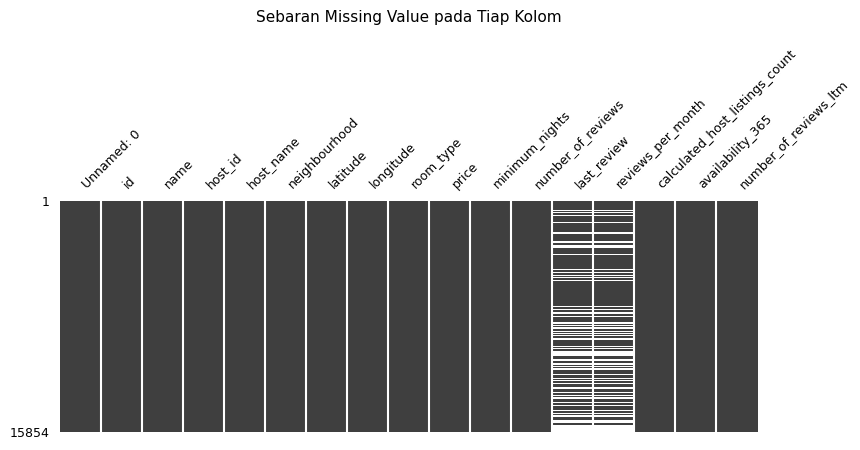

In [12]:
msno.matrix(df, sparkline=False, figsize=(9,3), fontsize=11)
plt.title('Sebaran Missing Value pada Tiap Kolom\n', fontsize=11, loc='center')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.show()

kolom `name` memiliki sedikit missing value

Karena `name` adalah informasi penting untuk listing, disarankan untuk mengisi atau menghapus baris tersebut tergantung jumlah missing-nya

Kolom lain seperti `price`, `room_type`, `latitude`, `longitude`, dll. tidak memiliki missing value.
Ini bagus karena kolom-kolom tersebut krusial untuk analisis harga, lokasi, dan jenis properti.

# Data Preprocessing

### Melakukan drop pada kolom yang tidak relevan dan menghilangkan missing value pada kolom name, dan host name

In [16]:
df.drop(columns='Unnamed: 0', inplace=True)
df.dropna(subset=['name', 'host_name'],inplace=True)

In [17]:
## Cek kembali data kolom unnamed dan missing value dari name dan host name
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Insight

Diketahui tipe data `last review` adalah object yang seharusnya adalah datetime

### Ubah kolom last review yang sebelumnya tipe datanya merupakan object diubah menjadi datetime, dan format menjadi 'YYYY-MM-DD'

In [20]:
# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Mengubah kolom 'last_review' menjadi datetime dengan format 'YYYY-MM-DD'
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

# Mengganti nilai '1970-01-01' pada kolom 'last_review' dengan '2000-01-01'
df['last_review'] = df['last_review'].replace(pd.Timestamp('1970-01-01'), pd.Timestamp('2000-01-01'))

### Insight
1. Proses diawali dengan mengubah tipe data last review yang sebelumnya merupakan **Object** diubah menjadi **Datetime**
2. Kemudian menyesuaikan format datetime yaitu 'YYYY-MM-DD'
3. Data kosong dari last review berubah menjadi 1970-01-01 diubah ke 2000-01-01 yang menandakan bahwa listing airbnb tersebut tidak memiliki review 

In [22]:
### Cek kembali dataset
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,NaN,3,365,0


In [23]:
## Cek kembali data types yang salah
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15845 non-null  int64         
 1   name                            15845 non-null  object        
 2   host_id                         15845 non-null  int64         
 3   host_name                       15845 non-null  object        
 4   neighbourhood                   15845 non-null  object        
 5   latitude                        15845 non-null  float64       
 6   longitude                       15845 non-null  float64       
 7   room_type                       15845 non-null  object        
 8   price                           15845 non-null  int64         
 9   minimum_nights                  15845 non-null  int64         
 10  number_of_reviews               15845 non-null  int64         
 11  last_re

## Melakukan pengecekan apakah ada baris yang duplikat

In [25]:
# Cek apakah ada duplikat secara keseluruhan (semua kolom sama persis)
duplikat = df.duplicated()
pd.DataFrame(duplikat)

,0
0,False
1,False
2,False
3,False
4,False
...,...
15849,False
15850,False
15851,False
15852,False


In [26]:
## Cek apakah ada duplikasi data
df.duplicated().sum()

0

In [27]:
df.nunique()

id                                15845
name                              14793
host_id                            6651
host_name                          5306
neighbourhood                        50
latitude                           9602
longitude                         10222
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1668
reviews_per_month                   513
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

## Melihat outlier pada data

In [29]:
# Hitung kuartil dan IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Hitung persentase outlier
outlier_percentage = (len(outliers) / len(df)) * 100

# Cetak persentasenya
outlier_count = outliers.shape[0]
total_count = df.shape[0]
print(f"Persentase outlier pada kolom 'price': {outlier_percentage:.2f}%")
print("Jumlah outlier:", outlier_count)

Persentase outlier pada kolom 'price': 8.85%
Jumlah outlier: 1402


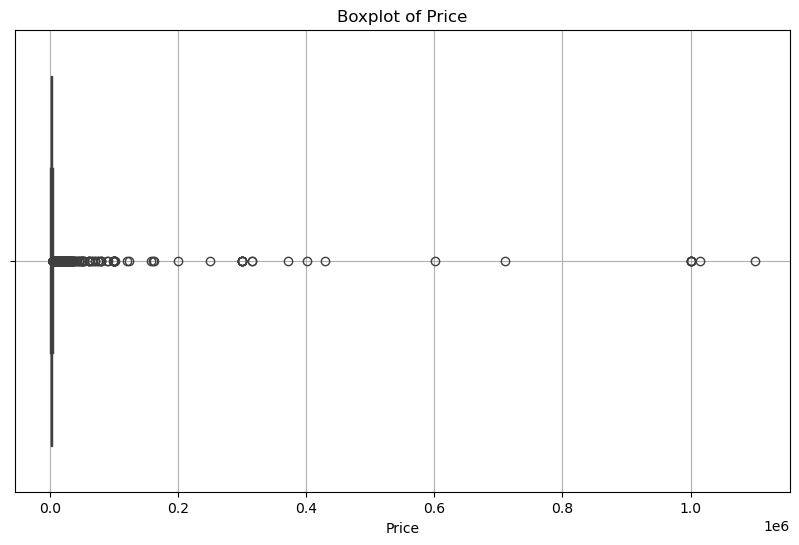

In [30]:
# Visualisasi boxplot kolom price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price")
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [31]:
## Statitiska Deskriptif
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.584500e+04,1.584500e+04,15845.000000,15845.000000,1.584500e+04,15845.000000,15845.000000,10061,10061.000000,15845.000000,15845.000000,15845.000000
mean,1.580294e+17,1.541645e+08,13.745148,100.559895,3.218580e+03,15.299905,16.663048,2021-08-30 19:10:44.428983040,0.813375,13.896813,244.319281,3.483496
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,2.104514e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,3.505717e+07,1.224556e+08,13.738490,100.561400,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.440000,4.000000,309.000000,0.000000
75%,5.258780e+07,2.392258e+08,13.759490,100.585140,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946611e+17,1.318845e+08,0.043044,0.050915,2.497917e+04,50.828453,40.623125,NaN,1.090277,30.276935,125.849614,8.919083


### Insight

`price`

pada kolom price dapat dilihat minimum harga adalah 0, yang dimana tidak relevan berhubungan mengingat tidak ada penginapan yang menawarkan harga gratis (0)

## Menampilkan harga kamar yang memiliki nilai 0

In [35]:
(df['price'] == 0).sum()

1

In [36]:
# Filter baris dengan harga minimum
min_price = df['price'].min()  # Harga minimum
filtered_data = df[df['price'] == min_price]  # Filter dataset
filtered_data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaT,NaN,1,0,0


In [37]:
# Mengidentifikasi indeks baris yang memenuhi kondisi outlier
drop0_price = df[df['price'] == 0].index

# Menghapus baris dengan indeks outlier
df.drop(drop0_price, inplace=True)

In [38]:
# cek kembali kolom price dengan nilai 0
(df['price'] == 0).sum()

0

In [39]:
## Melakukan pengecekan terhadap data kosong
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5783
reviews_per_month                 5783
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Mengganti NaN atau data kosong dengan 0 pada kolom 'last_review' dan 'reviews_per_month'

In [41]:
df['last_review'] = df['last_review'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [42]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [43]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0,0.00,3,365,0


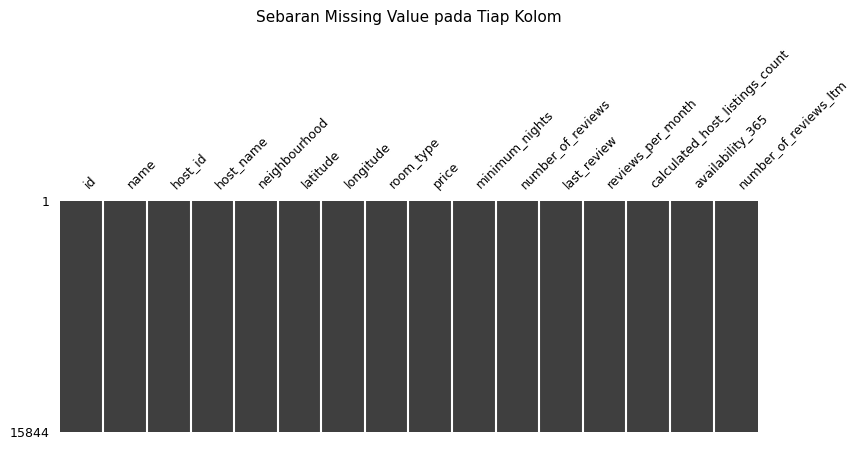

In [44]:
msno.matrix(df, sparkline=False, figsize=(9,3), fontsize=11)
plt.title('Sebaran Missing Value pada Tiap Kolom\n', fontsize=11, loc='center')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.show()

In [86]:
df.to_csv('clean_data.csv',index=False)

# Data Analysis

In [46]:
### melihat rata - rata harga berdasarkan room type

# Menghitung rata-rata harga berdasarkan tipe kamar
average_price_by_room_type = df.groupby('room_type')['price'].mean()

# menghitung jumlah tiap roomtype
room_type_count = df['room_type'].value_counts()

# Menghitung nilai minimum minimum_nights berdasarkan room_type
min_nights_by_room_type = df.groupby('room_type')['minimum_nights'].mean().round()

# Menghitung jumlah number_of_reviews berdasarkan room_type
reviews_by_room_type = df.groupby('room_type')['number_of_reviews'].mean().round()

# Menggabungkan hasil perhitungan rata-rata harga, jumlah tiap room type, minimum_nights, dan number_of_reviews berdasarkan room_type
result_df = pd.DataFrame({'average_price': average_price_by_room_type, 
                          'jumlah_tiap_room type': room_type_count,
                          'minimum_nights': min_nights_by_room_type,
                          'number_of_reviews': reviews_by_room_type})
    
# Mengurutkan hasil secara descending berdasarkan rata-rata harga
result_df = result_df.sort_values(by='average_price', ascending=False)

# Menampilkan DataFrame
pd.DataFrame(result_df)

,average_price,jumlah_tiap_room type,minimum_nights,number_of_reviews
room_type,,,,
Entire home/apt,3465.591404,8911,21.0,22.0
Private room,3066.661576,5762,10.0,9.0
Hotel room,3032.983025,648,2.0,20.0
Shared room,919.757170,523,4.0,5.0


C:\Users\User\AppData\Local\Temp\ipykernel_17984\824365856.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(room_type, rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_17984\824365856.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(room_type, rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_17984\824365856.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(room_type, rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_17984\824365856.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(room

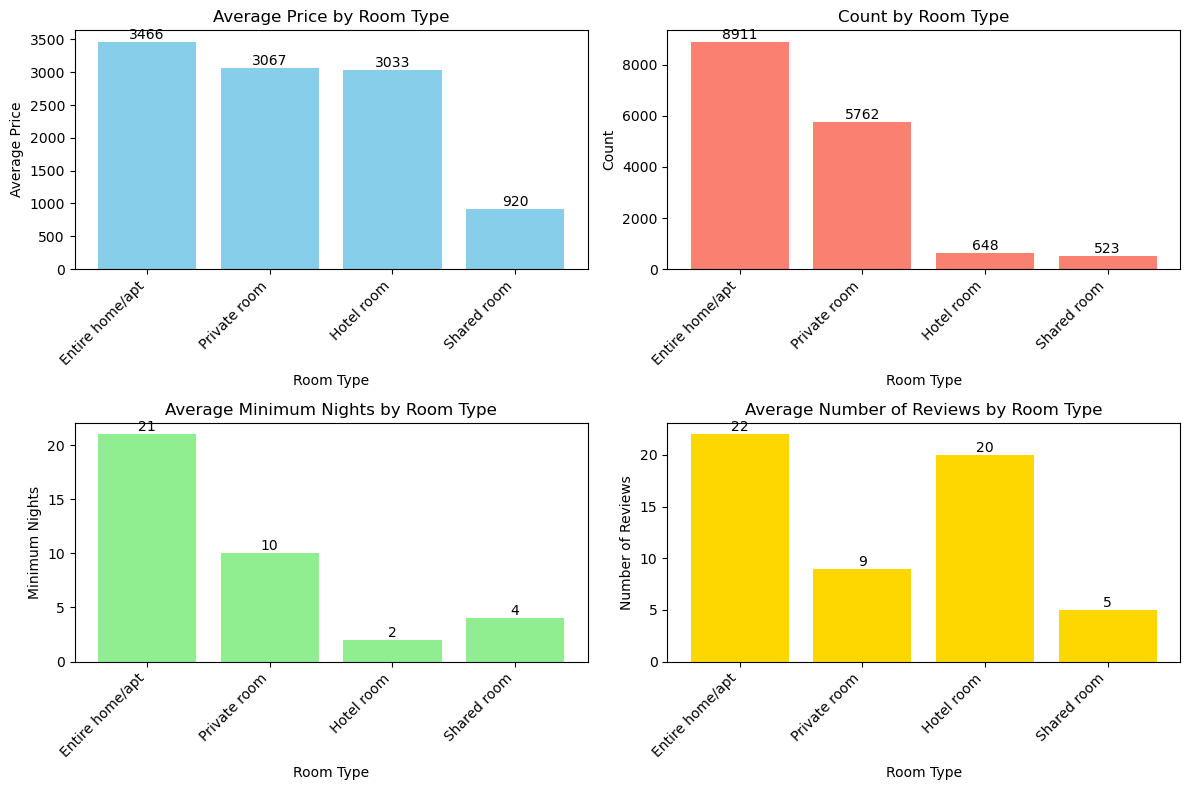

In [47]:
# Data
room_type = result_df.index
average_price = result_df['average_price']
jumlah_room_type = result_df['jumlah_tiap_room type']
minimum_nights = result_df['minimum_nights']
number_of_reviews = result_df['number_of_reviews']

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Barplot untuk rata-rata harga
axs[0, 0].bar(room_type, average_price, color='skyblue')
axs[0, 0].set_title('Average Price by Room Type')
axs[0, 0].set_ylabel('Average Price')
axs[0, 0].set_xticklabels(room_type, rotation=45, ha='right')

# Barplot untuk jumlah tiap room type
axs[0, 1].bar(room_type, jumlah_room_type, color='salmon')
axs[0, 1].set_title('Count by Room Type')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xticklabels(room_type, rotation=45, ha='right')

# Barplot untuk minimum nights
axs[1, 0].bar(room_type, minimum_nights, color='lightgreen')
axs[1, 0].set_title('Average Minimum Nights by Room Type')
axs[1, 0].set_ylabel('Minimum Nights')
axs[1, 0].set_xticklabels(room_type, rotation=45, ha='right')

# Barplot untuk number of reviews
axs[1, 1].bar(room_type, number_of_reviews, color='gold')
axs[1, 1].set_title('Average Number of Reviews by Room Type')
axs[1, 1].set_ylabel('Number of Reviews')
axs[1, 1].set_xticklabels(room_type, rotation=45, ha='right')

# Tambahkan label room_type pada setiap subplot
for ax in axs.flat:
    ax.set_xlabel('Room Type')

# Tambahkan penjelasan untuk setiap bar
for ax in axs.flat:
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                     bar.get_height()), 
                    ha='center', va='center', 
                    size=10, xytext=(0, 5), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()

### Insight 

**Insight Operasional dan Strategi:**

Profitabilitas: Jika fokus pada keuntungan, listing tipe "Entire home/apt" dan "Private room" dapat diprioritaskan karena mereka memiliki harga rata-rata yang tinggi dan popularitas yang baik.

Diversifikasi: Listing "Shared room" dan "Hotel room" lebih cocok untuk traveler dengan anggaran rendah atau masa inap singkat.

Target Pasar: Strategi pemasaran untuk "Entire home/apt" dapat diarahkan kepada pelancong jangka panjang atau keluarga, sedangkan "Hotel room" dapat menyasar turis yang menginap singkat.

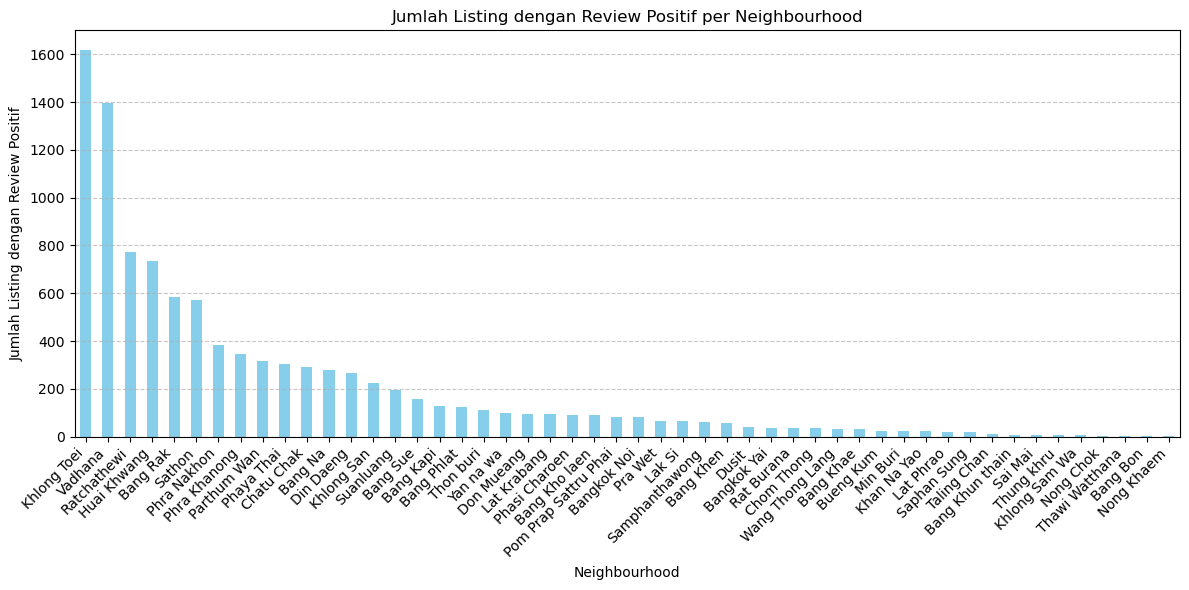

In [94]:
# Filter listing dengan review positif (setidaknya 1 review)
positive_reviews = df[df['number_of_reviews'] > 0]

# Hitung jumlah listing dengan review positif untuk tiap neighbourhood
review_counts = positive_reviews['neighbourhood'].value_counts().sort_values(ascending=False)
positive_reviews.to_csv('review_counts.csv')
# Visualisasi
plt.figure(figsize=(12, 6))
review_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Listing dengan Review Positif per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing dengan Review Positif')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Insight

**Dominasi Khlong Toei dan Ratchathewi:**

Khlong Toei memiliki jumlah listing dengan ulasan positif tertinggi, diikuti oleh Ratchathewi. 
Ini menunjukkan bahwa kedua kawasan tersebut cenderung populer di kalangan pelanggan atau memiliki kualitas listing yang lebih baik.

**Potensi di Kawasan Menengah:**

Kawasan seperti Phra Khanong, Pathum Wan, dan Chatuchak memiliki jumlah listing dengan ulasan positif yang cukup baik. Ini bisa menjadi kawasan dengan potensi pertumbuhan jika listing baru fokus pada peningkatan layanan.

**Kawasan dengan Performa Rendah:**

Kawasan seperti Nong Khaem, Thawi Watthana, dan Bang Bon berada di posisi paling bawah. Ini mungkin disebabkan oleh minimnya listing, lokasi yang kurang strategis, atau layanan yang perlu ditingkatkan.

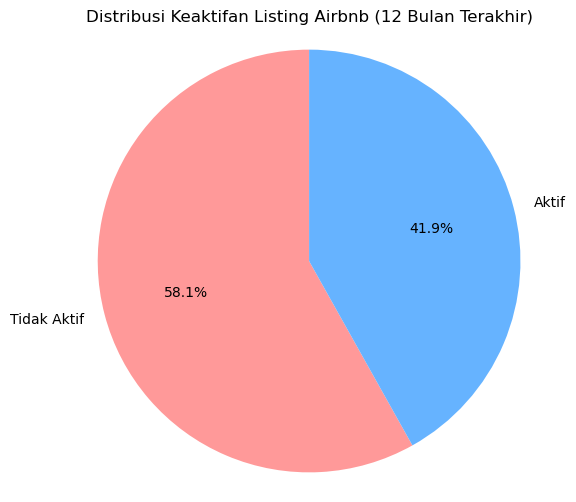

In [51]:
# Membuat kolom kategori keaktifan (aktif jika ada ulasan dalam 12 bulan terakhir)
df['kategori_keaktifan'] = df['number_of_reviews_ltm'].apply(lambda x: 'Aktif' if x > 0 else 'Tidak Aktif')

# Hitung jumlah listing dalam masing-masing kategori
keaktifan_counts = df['kategori_keaktifan'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    keaktifan_counts, 
    labels=keaktifan_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)

plt.title('Distribusi Keaktifan Listing Airbnb (12 Bulan Terakhir)')
plt.axis('equal')  # Agar pie chart tampil bulat
plt.show()

### Insight

**Tingkat Keaktifan Listing Rendah:**

Sebagian besar listing (58.1%) berada dalam kategori Tidak Aktif dalam 12 bulan terakhir. Ini menunjukkan bahwa lebih dari separuh listing mungkin sudah tidak diperbarui atau tidak tersedia untuk pemesanan.

**Potensi Optimalisasi Listing:**

Dengan hanya 41.9% listing yang aktif, ada peluang besar untuk mengoptimalkan listing yang tidak aktif agar kembali menarik perhatian pelanggan.

# Kesimpulan

**Faktor-Faktor yang Memengaruhi Rata-rata Harga Listing Berdasarkan Tipe Kamar**
Rata-rata harga listing di Airbnb dipengaruhi oleh beberapa faktor utama, seperti tipe kamar, lokasi (neighbourhood), jumlah ulasan, dan ketersediaan listing.

Tipe kamar "Entire Home/Apt" cenderung memiliki harga lebih tinggi dibandingkan tipe kamar lain seperti "Private Room" atau "Shared Room".

Lokasi di neighbourhood populer dengan ulasan positif tinggi juga meningkatkan nilai rata-rata harga.

Kesimpulan: Pemahaman faktor harga ini dapat membantu pemilik listing menyesuaikan harga secara kompetitif dan strategis untuk menarik lebih banyak tamu.

**Jumlah Review Positif sebagai Ukuran Popularitas Neighbourhood**
Neighbourhood dengan jumlah review positif tinggi menunjukkan tingkat popularitas yang lebih besar dibandingkan wilayah lain.

Kawasan seperti Khlong Toei, Ratchathewi, dan Huai Khwang memiliki jumlah listing dengan review positif tertinggi, menunjukkan daya tarik mereka sebagai destinasi populer.

Sebaliknya, neighbourhood dengan review positif rendah menunjukkan potensi untuk pengembangan atau perbaikan layanan.

Kesimpulan: Data ini dapat dimanfaatkan untuk merancang strategi pemasaran yang berfokus pada neighbourhood populer dan memberikan perhatian khusus pada pengembangan wilayah yang kurang populer.

**Pengaruh Frekuensi Ulasan Terbaru terhadap Keaktifan Listing**
   
Listing dengan ulasan terbaru yang lebih sering cenderung lebih aktif dan memiliki performa yang lebih baik.

Sebagian besar listing yang tidak aktif (58.1%) cenderung memiliki ulasan terbaru yang jarang atau tidak ada sama sekali dalam 12 bulan terakhir.

Frekuensi ulasan terbaru menjadi indikator penting untuk mengukur tingkat keaktifan dan daya tarik listing.

Kesimpulan: Meningkatkan frekuensi ulasan melalui kampanye dan insentif dapat menjadi strategi efektif untuk mempertahankan keaktifan dan meningkatkan performa listing.

**Kesimpulan Umum**

Harga listing dipengaruhi oleh tipe kamar, lokasi, dan jumlah ulasan.

Popularitas neighbourhood dapat diukur melalui jumlah review positif, yang menunjukkan preferensi tamu terhadap wilayah tertentu.

Frekuensi ulasan terbaru secara langsung memengaruhi tingkat keaktifan listing, menjadikannya metrik penting untuk memantau performa listing di Airbnb.

Dengan strategi yang tepat, seperti penyesuaian harga berdasarkan analisis data, promosi lokasi populer, dan peningkatan keaktifan listing, pemilik listing dapat meningkatkan daya saing dan pendapatan di Airbnb.

# Rekomendasi

1. **Analisis Faktor Harga Berdasarkan Tipe Kamar**

Langkah:

Gunakan analisis regresi untuk memahami hubungan variabel seperti lokasi (neighbourhood), tipe kamar, jumlah ulasan, dan ketersediaan terhadap harga.

Visualisasikan rata-rata harga untuk setiap tipe kamar per neighbourhood.

Rekomendasi:

Tawarkan strategi harga yang kompetitif untuk tipe kamar dengan permintaan rendah.

Promosikan listing dengan tipe kamar yang memiliki nilai tinggi (misalnya, "Entire Home/Apt").

2. **Jumlah Review Positif Berdasarkan Neighbourhood**

Langkah:

Hitung jumlah review positif untuk setiap neighbourhood.

Identifikasi neighbourhood dengan jumlah ulasan positif tertinggi.

Rekomendasi:

Fokus pengembangan listing di neighbourhood dengan ulasan positif tinggi.

Tawarkan pelatihan kepada pemilik listing di wilayah dengan ulasan rendah untuk meningkatkan kualitas layanan.